In [1]:
import os
import shutil

# Run from project dir
original_dataset_dir = '/Users/Alex/Desktop/Projects/Deep-Learning-with-Python/chapter 5/original_data/train'

base_dir = '/Users/Alex/Desktop/Projects/Deep-Learning-with-Python/chapter 5/data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# cat train data
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# cat validation data
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# cat test data
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# dog train data
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# dog validation data
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# dog test data
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


('total training cat images:', 1000)
('total training dog images:', 1000)
('total validation cat images:', 500)
('total validation dog images:', 500)
('total test cat images:', 500)
('total test dog images:', 500)


In [3]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print 'data batch shape:', data_batch.shape
    print 'labels batch shape:', labels_batch.shape
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 129s 1s/step - loss: 0.6880 - acc: 0.5455 - val_loss: 0.6634 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 122s 1s/step - loss: 0.6570 - acc: 0.6095 - val_loss: 0.6504 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 130s 1s/step - loss: 0.6162 - acc: 0.6655 - val_loss: 0.6076 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 138s 1s/step - loss: 0.5739 - acc: 0.6930 - val_loss: 0.6082 - val_acc: 0.6540
Epoch 5/30
100/100 [==============================] - 126s 1s/step - loss: 0.5378 - acc: 0.7335 - val_loss: 0.5933 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 126s 1s/step - loss: 0.5207 - acc: 0.7380 - val_loss: 0.6393 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 130s 1s/step - loss: 0.4852 - acc: 0.7540 - val_loss: 0.5773 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 134s 1s/step - 

In [9]:
model.save('cats_and_dogs_small_1.h5')

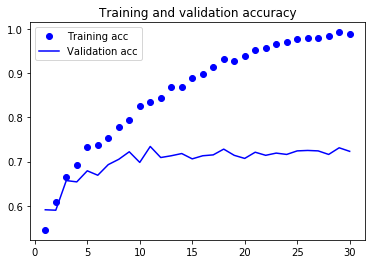

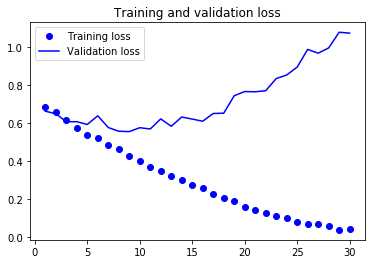

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

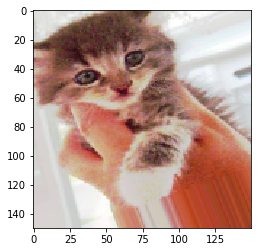

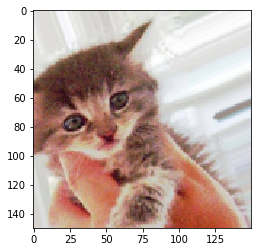

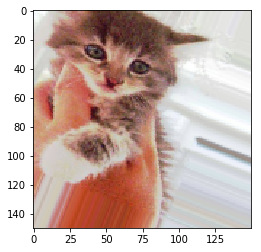

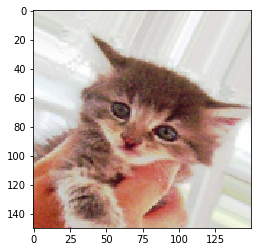

In [12]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 225s 2s/step - loss: 0.6929 - acc: 0.5106 - val_loss: 0.6837 - val_acc: 0.5964
Epoch 2/100
100/100 [==============================] - 221s 2s/step - loss: 0.6827 - acc: 0.5581 - val_loss: 0.6712 - val_acc: 0.5735
Epoch 3/100
100/100 [==============================] - 215s 2s/step - loss: 0.6755 - acc: 0.5684 - val_loss: 0.6825 - val_acc: 0.5596
Epoch 4/100
100/100 [==============================] - 204s 2s/step - loss: 0.6626 - acc: 0.6009 - val_loss: 0.6313 - val_acc: 0.6437
Epoch 5/100
100/100 [==============================] - 201s 2s/step - loss: 0.6508 - acc: 0.6172 - val_loss: 0.6276 - val_acc: 0.6332
Epoch 6/100
100/100 [==============================] - 207s 2s/step - loss: 0.6387 - acc: 0.6219 - val_loss: 0.6158 - val_acc: 0.6546
Epoch 7/100
100/100 [==============================] - 220s 2s/step - loss: 0.6266 - acc: 0.6438 - val_loss: 0.6

100/100 [==============================] - 214s 2s/step - loss: 0.4641 - acc: 0.7756 - val_loss: 0.4429 - val_acc: 0.7880
Epoch 62/100
100/100 [==============================] - 224s 2s/step - loss: 0.4652 - acc: 0.7709 - val_loss: 0.4610 - val_acc: 0.7836
Epoch 63/100
100/100 [==============================] - 211s 2s/step - loss: 0.4520 - acc: 0.7828 - val_loss: 0.4550 - val_acc: 0.7925
Epoch 64/100
100/100 [==============================] - 211s 2s/step - loss: 0.4551 - acc: 0.7944 - val_loss: 0.5444 - val_acc: 0.7532
Epoch 65/100
100/100 [==============================] - 211s 2s/step - loss: 0.4502 - acc: 0.7869 - val_loss: 0.4576 - val_acc: 0.7906
Epoch 66/100
100/100 [==============================] - 212s 2s/step - loss: 0.4545 - acc: 0.7813 - val_loss: 0.4408 - val_acc: 0.7938
Epoch 67/100
100/100 [==============================] - 211s 2s/step - loss: 0.4575 - acc: 0.7850 - val_loss: 0.7115 - val_acc: 0.6910
Epoch 68/100
100/100 [==============================] - 217s 2s/step

In [15]:
model.save('cats_and_dogs_small_2.h5')

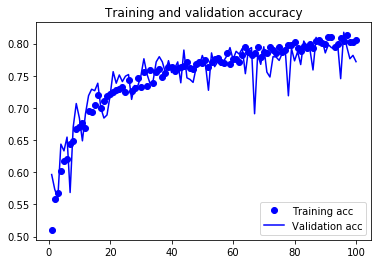

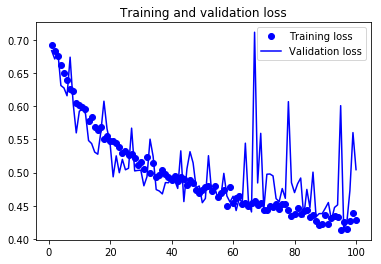

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
